In [39]:
import pandas as pd

gemma = pd.read_csv('./exp/gemma/results_gemma_n10_seed.csv', index_col = [0])
gemma = res[['r', 'alpha', 'bleu', 'comet']]

llama = pd.read_csv('./exp/llama3/results_llama3_n10_seed.csv', delimiter=';')

gemma['r'] = [str(i) for i in gemma['r']]
llama['r'] = [str(i) for i in llama['r']]
gemma['alpha'] = [str(i) for i in gemma['alpha']]
llama['alpha'] = [str(i) for i in llama['alpha']]

gemma['bleu'] = [i*100 for i in gemma['bleu']]
gemma['comet'] = [i*100 for i in gemma['comet']]

llama

,r,alpha,bleu,comet
0,16,16,"65,8481776532402","92,96"
1,16,32,"65,59","92,82"
2,32,32,"66,0206308925869","93,10"
3,32,64,"66,13","93,37"
4,64,64,"67,3004220403365","93,09"
5,64,128,"67,62","93,23"
6,128,128,"70,06","93,29"
7,128,256,"69,06","92,97"
8,256,256,"67,77","92,90"
9,256,512,"66,61","92,84"


In [40]:
compare_bleu = [65.59, 66.13, 67.62]

In [25]:
llama_aeqr = llama[llama['r'] == llama['alpha']]
llama_aleqr = llama[llama['r'] != llama['alpha']]
compare_gemma = llama_aleqr[llama_aleqr['r'].isin(['16', '32', '64'])]

compare_gemma

,r,alpha,bleu,comet
1,16,32,"65,59","92,82"
3,32,64,"66,13","93,37"
5,64,128,"67,62","93,23"


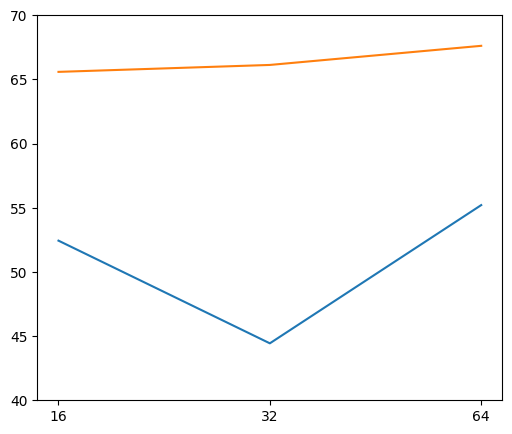

In [47]:
import matplotlib.pyplot as plt

r = gemma['r'].to_list()
alpha = gemma['alpha'].to_list()

gemma_bleu = gemma['bleu'].to_list()
gemma_comet = gemma['comet'].to_list()

llama_bleu = compare_gemma['bleu'].to_list()
llama_comet = compare_gemma['comet'].to_list()


plt.figure(1, figsize = (6,5))
ax = plt.gca()
ax.set_ylim([40, 70])
plt.plot(r, gemma_bleu)
plt.plot(r, compare_bleu)

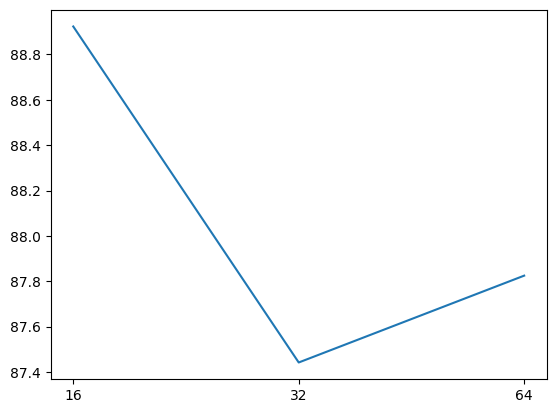

In [34]:
plt.plot(r, gemma_comet)